In [24]:
#Importing Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import eli5 
from eli5.sklearn import PermutationImportance
import shap

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing The Dataset Downloaded From Kaggle
data = pd.read_csv('/home/kanax/Desktop/ML_Projects/breast_cancer.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#Dropping Irrelevant Columns
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [6]:
#Encoding The Entries In The Class
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Checking For Null Values
data.isnull().any().any()

False

In [13]:
#Checking For Duplicates
data.duplicated().sum()

0

[Text(0, 0.5, 'Count')]

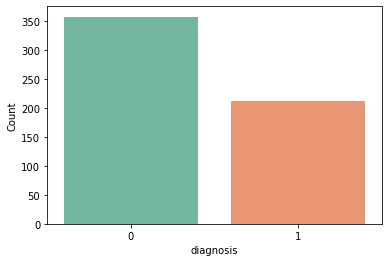

In [14]:
#Checking For Imbalance In Class Values
p = sns.countplot(data=data, x='diagnosis', order=data.diagnosis.value_counts().index,palette="Set2")
p.set(ylabel = "Count")

In [15]:
#Splitting Our Dataset With The (stratify=) Parameter Set To True
from sklearn.model_selection import train_test_split

X,y = data.drop(['diagnosis'],axis=1), data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

In [16]:
#Fitting A Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
#Evaluating The Performance Of Our Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, f1_score
    
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(accuracy, precision, recall, f1)

0.9473684210526315 0.9736842105263158 0.8809523809523809 0.925


In [21]:
'''
Even with no hyperparameter tuning our model's performance is great.
Now, let's see explore the explainability of the classifier we have built.
'''

#Shuffling Individual Variables & Computing It's Effect On Accuracy.
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=30)

Weight,Feature
0.0211 ± 0.0211,texture_mean
0.0158 ± 0.0375,concave points_worst
0.0123 ± 0.0179,perimeter_worst
0.0105 ± 0.0131,texture_worst
0.0070 ± 0.0070,smoothness_se
0.0070 ± 0.0070,area_mean
0.0070 ± 0.0070,perimeter_se
0.0053 ± 0.0086,compactness_se
0.0053 ± 0.0263,radius_worst
0.0035 ± 0.0086,fractal_dimension_se


In [28]:
'''
The values towards the top are the most important features, and those towards the bottom matter least. 
We can verify this by varying a single variable in a single row across a range of values and see what 
effect it has on the outcome.
'''
from pdpbox import pdp, info_plots

base_features = data.columns.values.tolist()
base_features.remove('diagnosis')

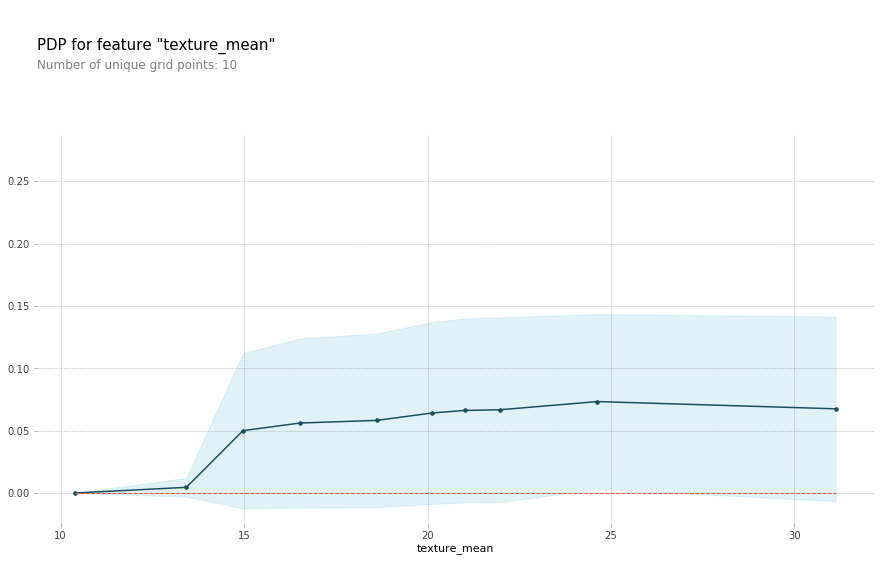

In [29]:
#Varying The Most Significant Feature In An Interval Centered At It's Mean (=19.289649 ~ 20)
feat_name = 'texture_mean'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

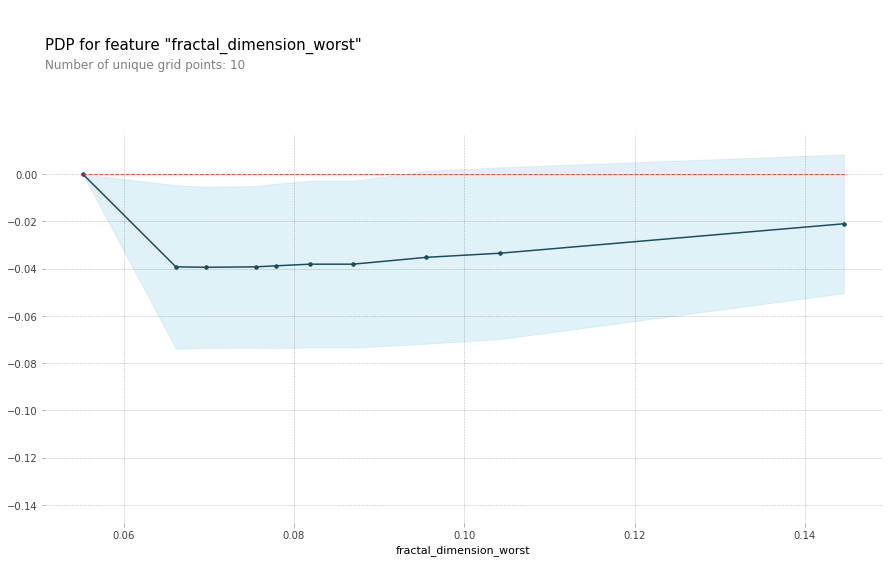

In [31]:
#Varying The Least Significant Feature In An Interval Centered At It's Mean (=0.083946 ~ 0.08)
feat_name = 'fractal_dimension_worst'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

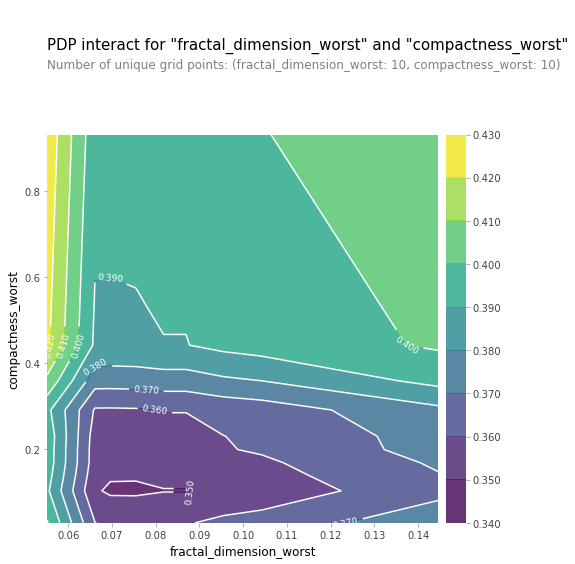

In [49]:
'''
Interestingly enough, we can also plot the partial dependence of two features at once using a 2D-PDP.
We use this to explain the influence of 'fractal_dimension_worst' even though it's permutation importance is
not as significant.
'''
inter  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['fractal_dimension_worst', 'compactness_worst'])
pdp.pdp_interact_plot(pdp_interact_out=inter, feature_names=['fractal_dimension_worst', 'compactness_worst'], plot_type='contour')
plt.show()

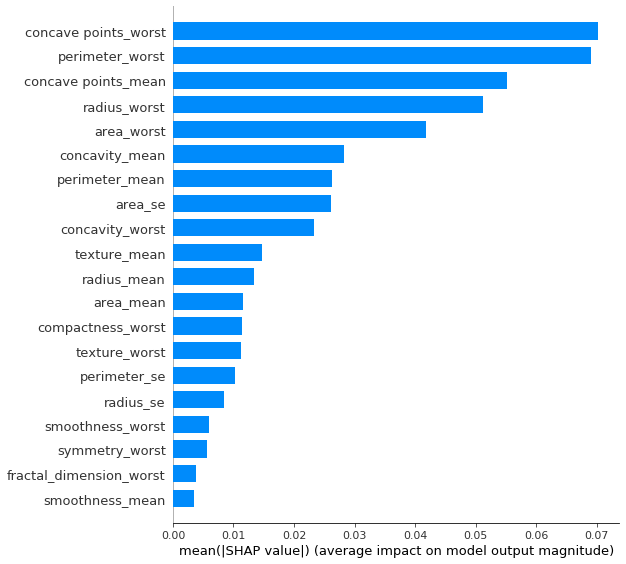

In [33]:
'''
Let's see what the influence of the values of every variable in a single row is when compared
to their baseline values.
'''
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

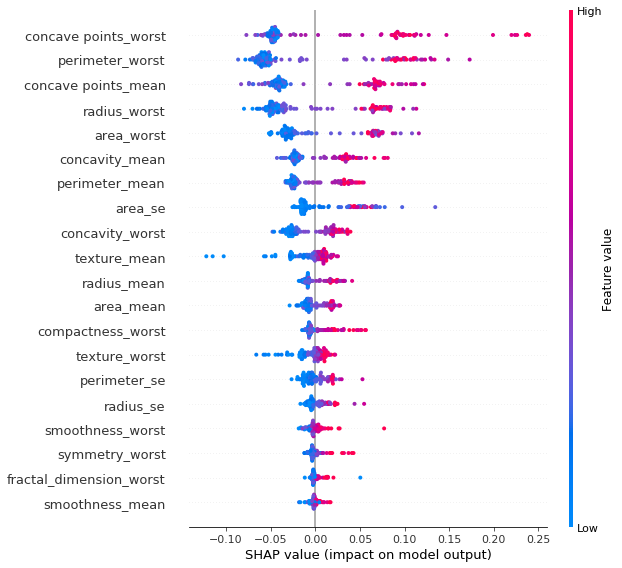

In [50]:
shap.summary_plot(shap_values[1], X_test)

In [51]:
'''
Lastly, in the spirit of explaining the predictions our model is making, we define a function which returns
the probablity of the cancer being malignant along with the features that impacted the prediction. 
'''
def heart_disease_risk_factors(model, patient):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [66]:
#Example Of A Positive Prediction
data_for_prediction = X_test.iloc[13,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [72]:
#Example Of A Neutral (Uncertain) Prediction
data_for_prediction = X_test.iloc[18,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [88]:
#Example Of A Negative Prediction
data_for_prediction = X_test.iloc[19,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)